# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN

In [68]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


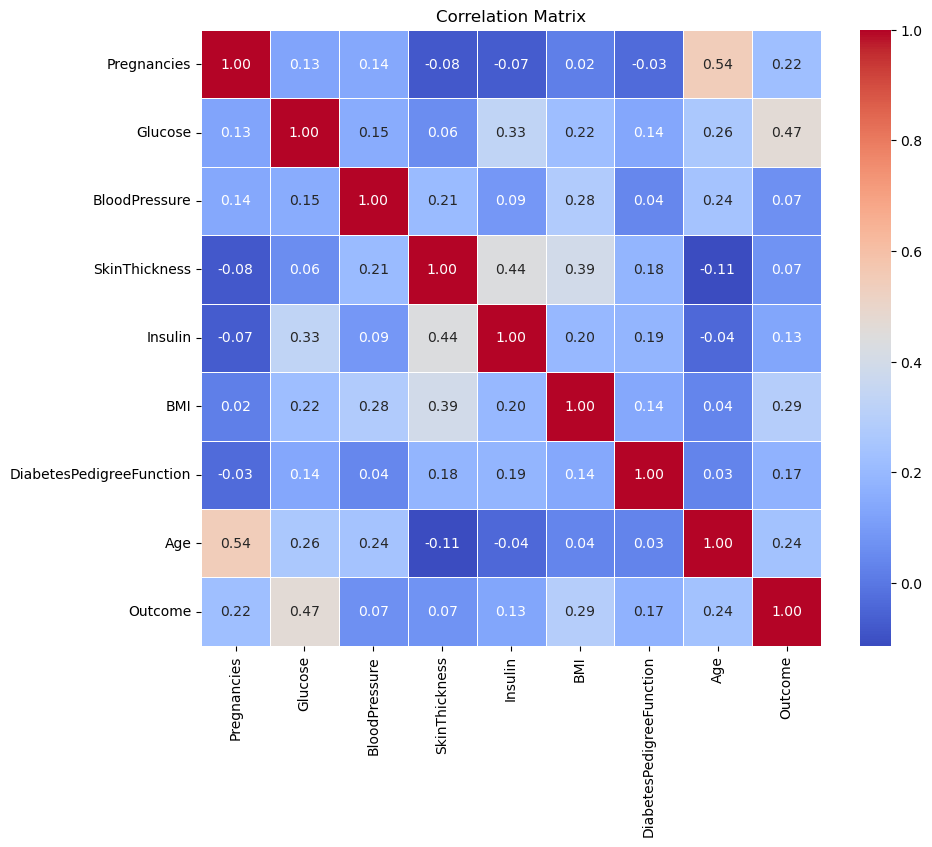

In [69]:
#Create correlation matrix for dataframe
correlation_matrix = df.corr()

#Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Overall, we can see relatively low correlation between features except for Age-Pregnancy, Glucose-Outcome, and SkinThickness-Insulin. For now we will leave all features, however, we can re-evaluated if removing certain features will support the overall analysis

In [70]:
#Check dataset for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


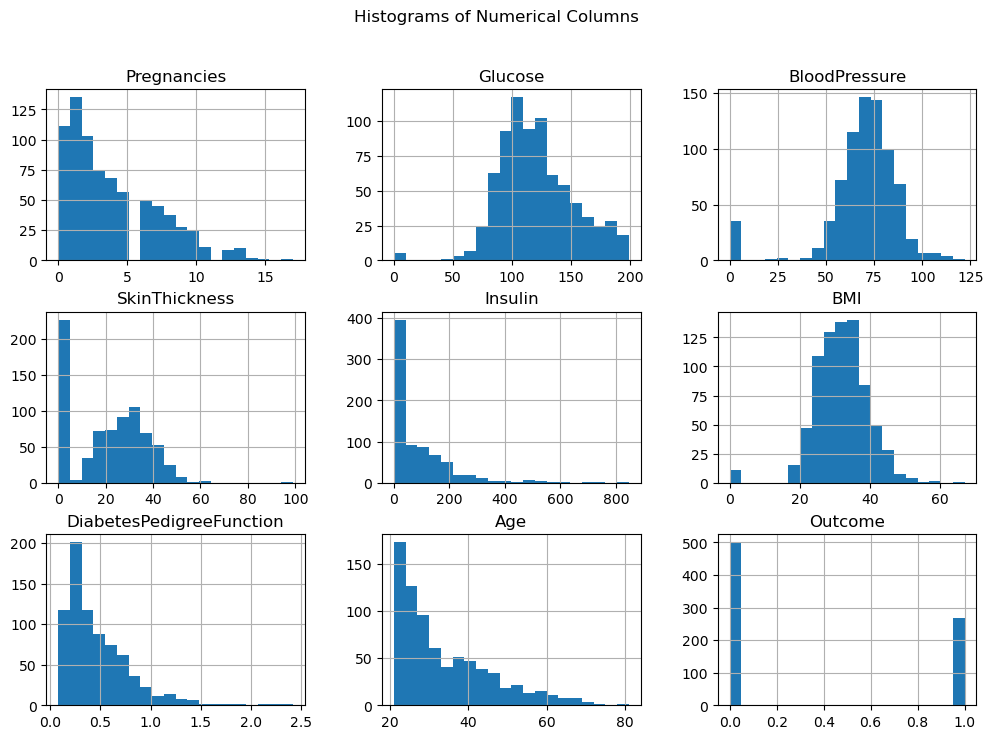

In [72]:
df.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [73]:
#Analyze statistics for the Pregnancies column and check for any outliers
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [74]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [75]:
#Drop all rows with > 12 pregnancies as these appear to be outliers
df.drop(df[df['Pregnancies'] > 12].index, inplace=True)
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
Name: count, dtype: int64

In [76]:
df['Glucose'].describe()

count    754.000000
mean     120.713528
std       32.016806
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

Since Glucose appears to be normally distributed based on the visual and the describe statistics do not highlight any extreme outliers no rows will be removed based on this column

In [77]:
df['BloodPressure'].describe()

count    754.000000
mean      69.035809
std       19.246222
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Since Blood Pressure appears to be normally distributed based on the visual and the describe statistics do not highlight any extreme outliers no rows will be removed based on this column

In [78]:
df['SkinThickness'].describe()

count    754.000000
mean      20.518568
std       15.917043
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [79]:
df['SkinThickness'].value_counts().sort_values(ascending = False)

SkinThickness
0     222
32     30
30     25
27     23
23     22
28     20
18     20
31     19
33     19
39     18
19     17
29     17
26     16
22     16
40     16
35     15
25     15
37     15
36     14
15     14
41     14
17     14
20     13
24     12
13     11
42     11
21     10
46      8
34      8
38      7
12      7
45      6
14      6
16      6
43      6
11      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
63      1
60      1
54      1
56      1
51      1
99      1
Name: count, dtype: int64

In [80]:
#Drop all rows where skin thickness < 1 and > 50 as these are likely outliers
df.drop(df[(df['SkinThickness'] == 0) | (df['SkinThickness'] > 50)].index, inplace=True)
df['SkinThickness'].value_counts()

SkinThickness
32    30
30    25
27    23
23    22
28    20
18    20
33    19
31    19
39    18
19    17
29    17
40    16
22    16
26    16
37    15
25    15
35    15
17    14
36    14
15    14
41    14
20    13
24    12
42    11
13    11
21    10
34     8
46     8
38     7
12     7
43     6
16     6
45     6
14     6
11     6
44     5
10     5
47     4
48     4
50     3
49     3
7      2
8      2
Name: count, dtype: int64

In [81]:
df['Insulin'].describe()

count    524.000000
mean     114.566794
std      123.908656
min        0.000000
25%        0.000000
50%       90.000000
75%      165.250000
max      846.000000
Name: Insulin, dtype: float64

In [82]:
df['Insulin'].value_counts()

Insulin
0      142
105     11
130      9
120      8
140      8
      ... 
43       1
108      1
73       1
171      1
112      1
Name: count, Length: 182, dtype: int64

In [83]:
#Drop all insulin values that are equal to zero and > 330 (2x 75% based on descriptive statistics) as these are likely outliers
df.drop(df[(df['Insulin'] == 0) | (df['Insulin'] > 330)].index, inplace=True)
df['Insulin'].value_counts()

Insulin
105    11
130     9
120     8
140     8
94      7
       ..
89      1
270     1
228     1
249     1
112     1
Name: count, Length: 156, dtype: int64

In [84]:
df['BMI'].describe()

count    355.000000
mean      32.517465
std        6.950351
min        0.000000
25%       27.800000
50%       32.800000
75%       36.550000
max       67.100000
Name: BMI, dtype: float64

In [85]:
#Drop all BMI values where BMI = 0 as this is not realistics
df.drop(df[(df['Insulin'] == 0)].index, inplace=True)
df['Insulin'].value_counts()

Insulin
105    11
130     9
120     8
140     8
94      7
       ..
89      1
270     1
228     1
249     1
112     1
Name: count, Length: 156, dtype: int64

In [86]:
df['Age'].describe()

count    355.000000
mean      30.428169
std        9.952560
min       21.000000
25%       23.000000
50%       27.000000
75%       35.000000
max       81.000000
Name: Age, dtype: float64

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [142]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [143]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [145]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

print("Original shapes:")
print(X_train.shape, y_train.shape)
#print("Oversampled and scaled shapes:")
#print(X_train_scaled.shape, y_train_resampled.shape)
#print("Test set (scaled):")
#print(X_test_scaled.shape, y_test.shape)

Original shapes:
(395, 8) (395,)


In [148]:
#Confirm that oversampling has resulted in a balanced dataset
y_train.value_counts()

Outcome
0    204
1    191
Name: count, dtype: int64

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

**Create Base Model using Logistic Regression**

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [149]:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)
y_pred_lr = logistic_regression_model.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80        43
           1       0.87      0.80      0.83        56

    accuracy                           0.82        99
   macro avg       0.82      0.82      0.82        99
weighted avg       0.82      0.82      0.82        99



**Create Random Forest Ensemble Model**

In [150]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.8585858585858586
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       0.88      0.88      0.88        56

    accuracy                           0.86        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.86      0.86      0.86        99



**Optimize Random Forest Classifier Model**

In [156]:
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [157]:
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set: 0.8787878787878788


Overall, we can see that by conducting a grid search on the random forest model, we can improve the overall accuracy slightly from 0.85 to 0.87

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Based on the Supervised Learning project, here are the four (4) key takeaways I learned:
1) It is important to conduct good data cleaning and preparation. Overall, I made some limiting assumptions in the interest of time such as removing outliers, however, if more time was given I would explored replacing with mean, median, etc. to see how this affects the model
2) Order matters when scaling, balancing, and splitting data. At first I split the data into train/test sets and then applied scaling and balancing via oversampling which resulted in poor results. Scaling and oversampling the data and then splitting the model into train/test yielded more favourable results
3) Handling imbalanced data is important. Given more time I would have tested other approaches such as undersampling, SMOTE, etc.
4) Hyperparameter tuning is important but largely felt like a black box. It's unclear the trade-off between the base model and going to a max depth of 20 and whether this would result in overfitting. As mentioned, given more time I would have loved to pursue other models.